In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
#from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
!ls bank-add*

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
data = pd.read_csv('bank-additional.csv', header=0,sep=';')

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
data.replace(['basic.6y','basic.4y', 'basic.9y'], 'basic', inplace=True)

In [7]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [8]:
data.shape

(4119, 21)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4119.0,40.113620,10.313362,18.000,32.000,38.000,47.000,88.000
duration,4119.0,256.788055,254.703736,0.000,103.000,181.000,317.000,3643.000
campaign,4119.0,2.537266,2.568159,1.000,1.000,2.000,3.000,35.000
pdays,4119.0,960.422190,191.922786,0.000,999.000,999.000,999.000,999.000
previous,4119.0,0.190337,0.541788,0.000,0.000,0.000,0.000,6.000
emp.var.rate,4119.0,0.084972,1.563114,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,4119.0,93.579704,0.579349,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,4119.0,-40.499102,4.594578,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,4119.0,3.621356,1.733591,0.635,1.334,4.857,4.961,5.045
nr.employed,4119.0,5166.481695,73.667904,4963.600,5099.100,5191.000,5228.100,5228.100


### EDA

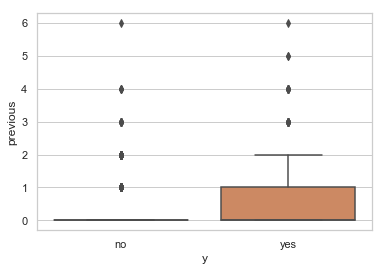

In [10]:
sns.boxplot(x='y',y='previous',data=data)

In [11]:
# remove outliers in dataset

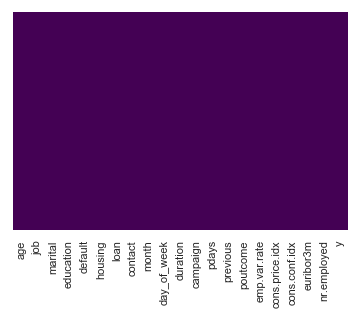

In [12]:
# check for any missing values
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

It seems that we do not have any missing values

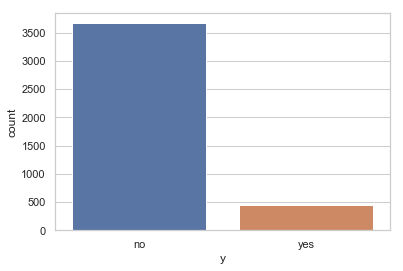

In [13]:
sns.countplot(x='y',data=data)
plt.show()

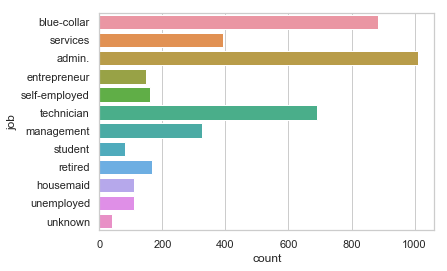

In [14]:
#Customer job description
sns.countplot(y="job", data=data)
plt.show()

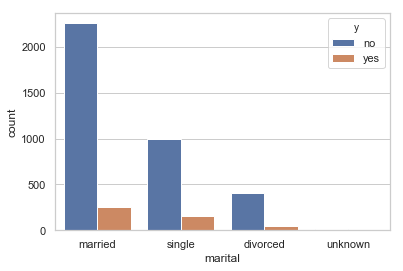

In [15]:
#Customer marital status
sns.countplot(x="marital", data=data,hue='y')

In [16]:
data['marital'][data['marital']=="unknown"]=data['marital'].mode()[0]

c:\users\320029165\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


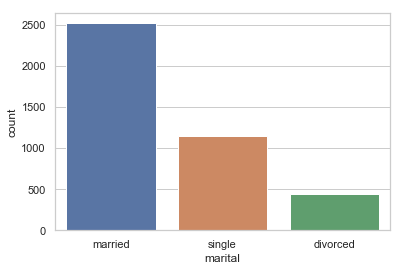

In [17]:
#Customer marital status after imputing values
sns.countplot(x="marital", data=data)

In [18]:
data.marital.value_counts()

married     2520
single      1153
divorced     446
Name: marital, dtype: int64

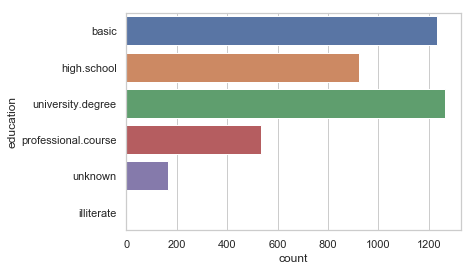

In [19]:
sns.countplot(y='education', data=data)

In [20]:
data['education'][data['education']=="unknown"]=data['education'].mode()[0]

c:\users\320029165\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


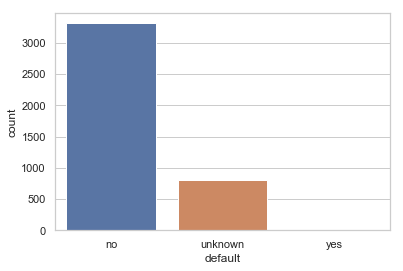

In [21]:
#credit in default
sns.countplot(x="default", data=data)

In [22]:
print(data.default.value_counts())
data['default'][data['default']=="unknown"]=data['default'].mode()[0]
print('-----------------------')
print('After imputing......')
print('----------------------')
print(data.default.value_counts())

no         3315
unknown     803
yes           1
Name: default, dtype: int64
-----------------------
After imputing......
----------------------
no     4118
yes       1
Name: default, dtype: int64


c:\users\320029165\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


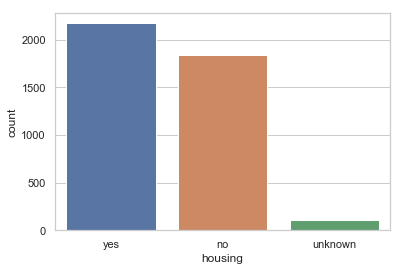

In [23]:
# Housing loan plot
sns.countplot(x="housing", data=data)

In [24]:
print(data.housing.value_counts())
data['housing'][data['housing']=="unknown"]=data['housing'].mode()[0]
print('--------------------------------')
print('After imputing......')
print('--------------------------------')
print(data.housing.value_counts())

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64
--------------------------------
After imputing......
--------------------------------
yes    2280
no     1839
Name: housing, dtype: int64


c:\users\320029165\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


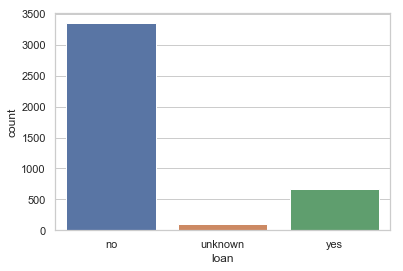

In [27]:
# plot for personal loan
sns.countplot(x="loan", data=data)

In [28]:
data['loan'][data['loan']=="unknown"]=data['loan'].mode()[0]


c:\users\320029165\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


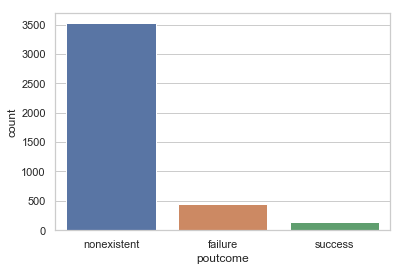

In [29]:
# previous marketing campaign outcome
sns.countplot(x="poutcome", data=data)

There seems to be lot of unknown values in some of the attributes. These missing values can be treated as a possible class label or using deletion or imputation techniques. 

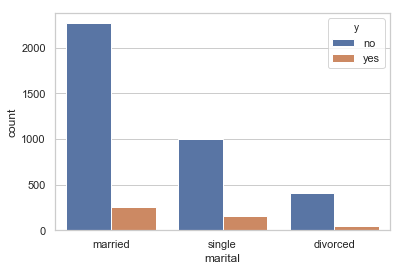

In [30]:
sns.countplot(x='marital',data=data,hue='y')

### Pre Processing

Sklearn provides a very efficient tool for encoding the levels of a categorical features into numeric values. LabelEncoder encode labels with value between 0 and n_classes-1

In [33]:
le = preprocessing.LabelEncoder()

In [34]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = le.fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = le.fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [35]:
from sklearn.pipeline import Pipeline
encoding_pipeline = Pipeline([
    ('encoding',MultiColumnLabelEncoder(columns=['job','marital','education','housing','loan','poutcome','y']))
    # add more pipeline steps as needed
])
data = encoding_pipeline.fit_transform(data)

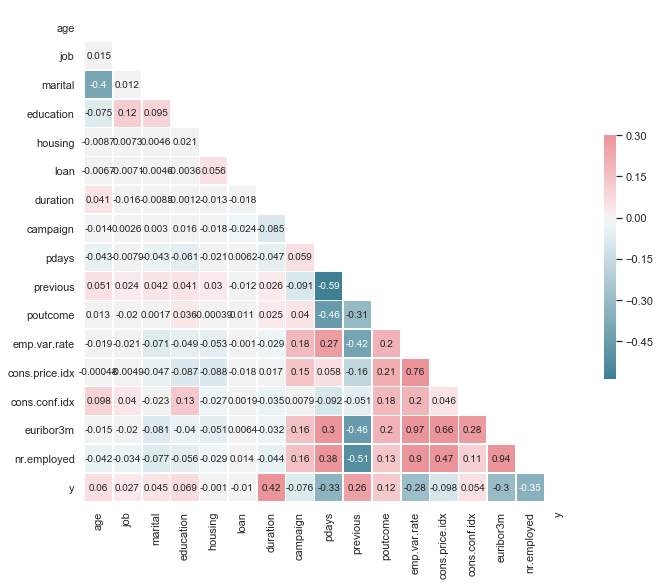

In [38]:
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

In [39]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [40]:
data.drop(['duration','contact','month','day_of_week','default','pdays',],axis=1,inplace=True)

In [41]:
data.shape

(4119, 15)

#### Train Test split

In [42]:
data.head()

,age,job,marital,education,housing,loan,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,0,1,0,2,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,1,0,0,4,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,1,1,0,1,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,0,1,0,3,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,4,1,0,1,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [43]:
#y=le.fit_transform(y)
X = data.drop(['y'], axis=1)
y = data['y']

In [44]:
print(X.columns)
print(y[0:5])

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'campaign',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int32


### Train the model

In [45]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
lr=LogisticRegression()

In [47]:
lr.fit(X_train, y_train)

c:\users\320029165\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [48]:
predict = lr.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.9053398058252428

In [50]:
print(y_test[0:5])
print('----------------')
print(predict[0:5])

889     1
2669    0
2707    0
2258    0
2514    1
Name: y, dtype: int32
----------------
[0 0 0 0 0]


In [51]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, predict).T, index=['No', 'Yes'], columns=['No', 'Yes']) 
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1098,110
Yes,7,21


#### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0) 
rf.fit(X_train, y_train)

c:\users\320029165\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

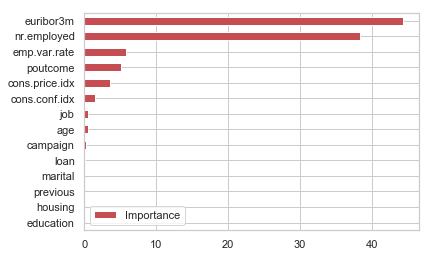

In [53]:
Importance = pd.DataFrame({'Importance':rf.feature_importances_*100}, index=X_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [54]:
predict = rf.predict(X_test)

In [55]:
accuracy_score(y_test, predict)

0.8996763754045307

Here we can see that the `euribor`, `# of employees` , `employment variation rate`, `previous outcome` have the most feature importance

In [56]:
# Calculate how many calls were made in total
total_calls = sum(data['campaign'])
print(total_calls)

10451


In [57]:
extra_calls = data[data['campaign'] > 5]['campaign'].sum() - 5*data[data['campaign']>5].shape[0]

In [58]:
# Calculate reduction in marketing cost
reduction=100*extra_calls/total_calls
print(reduction)

13.568079609606736


In [59]:
# 0 - yes , 1- no
total_sales=float(data[data['y']==0].shape[0])
print(total_sales)

3668.0


In [60]:
less_costly_sales=float(data[(data['campaign'] <= 6) & (data['y']==0)].shape[0])
print(less_costly_sales)

3439.0


In [61]:
sales_percent=100*less_costly_sales/total_sales
print(sales_percent)

93.75681570338058


In [62]:
data[data['y']==0]['y'].count()

3668

We have 11% of people who have not taken term deposit

The objective, is to identify the characteristics of customers who are most likely to subscribe  to term  deposits  of  the  bank. **The customers who subscribed  and  therefore  are  most  likely  to  subscribe**  to  the bank's  term  deposit.  One observes  that  this  cluster  is  made  of  persons  in  managerial positions who are  married.  A  logical  reason  for  this  might be for the fact that, as responsible as they are i.e. being managers, they  would  want  to  secure  the  future  of  their  children  and themselves when  they  retire or  when the unexpected happens. What  is  more,  the  group  of  customers  had  a  minimum secondary  level  of  education.  This  indicates  that  customers with their level of education being secondary and above, make a good  target  for  direct  marketing  (sale)  of  term deposits like treasury bills  and  bonds.  In  addition to this, one observes that this  cluster  represent  those  customers on  whom  the bank  had spent  the  most  ‘talking  time’  i.e.  longer  call  duration (376.685sec)  with